In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

In [ ]:
my_url = 'https://www.newsit.gr/tags/amvloseis/'

raw_html = urlopen(my_url).read()
abortion_doc = BeautifulSoup(raw_html, "html.parser")


Τυπώνουμε όλο το περιεχόμενο της σελίδας


In [ ]:
print(abortion_doc)

<!DOCTYPE html>

<html lang="el">
<head>
<meta charset="utf-8"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<!--
    <link rel="preload" href="/wp-content/themes/generatepress_child/fonts/roboto-v20-latin_greek-regular.woff2" as="font" type="font/woff2" crossorigin>
    <link rel="preload" href="/wp-content/themes/generatepress_child/fonts/roboto-v20-latin_greek-700.woff2" as="font" type="font/woff2" crossorigin>
    <link rel="preload" href="/wp-content/themes/generatepress_child/fonts/roboto-v20-latin_greek-italic.woff2" as="font" type="font/woff2" crossorigin>

    <link rel="stylesheet" href="/wp-content/themes/generatepress_child/fonts/fonts.css" media="print" onload="this.media='all'" />
-->
<meta content="max-image-preview:large" name="robots">
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- This site is optimized with the Yoast SEO Premium plugin v15.4 - https://yoast.com/wordpress/plugins/seo/ -->
<title>ΑΜΒΛΩΣΕΙΣ - NewsIT</title>
<meta con

Από όλο το περιεχόμενο, παίρνουμε τα links για τα συγκεκριμένα άρθρα


In [ ]:
links=[]
for tag in abortion_doc.find_all('div',{'class': 'image'}):
    for anchor in tag.find_all('a'):
        links.append(anchor['href'])
print(links)

['https://www.newsit.gr/kosmos/amvloseis-stis-ipa-ginontai-politiko-thema-eno-stin-eyropi-to-anotato-dikastirio-vriskei-mimites/3555691/', 'https://www.newsit.gr/kosmos/amvloseis-dixasmos-stis-ipa-poies-politeies-tis-periorizoun-kai-poies-tis-enisxyoun/3555270/', 'https://www.newsit.gr/kosmos/i-Google-pire-thesi-gia-tis-amvloseis-ti-tha-kanei/3555253/', 'https://www.newsit.gr/kosmos/amvloseis-to-pentagono-ton-ipa-tha-synexisei-na-tis-prosferei-vasei-omospondiakou-nomou/3553728/', 'https://www.newsit.gr/kosmos/apagoreysi-amvloseon-stis-ipa-freno-apo-tin-louiziana-stin-efarmogi-tis-apofasis/3552572/', 'https://www.newsit.gr/politikh/sakellaropoulou-gia-apagoreysi-amvloseon-stis-eyalotes-gynaikes-den-apomenei-para-o-skoteinos-kosmos-ton-paranomon-iatreion/3551915/', 'https://www.newsit.gr/kosmos/amvloseis-stis-ipa-sigi-ixthyos-apo-megales-nomikes-etaireies/3551891/', 'https://www.newsit.gr/kosmos/vatikano-otan-eisai-yper-tis-zois-voithas-tis-gynaikes-na-tin-ypodexthoun/3551247/', 'https:/

Ανοίγουμε το κάθε link και παίρνουμε από αυτό κάθε πεδίο που χρειαζόμαστε
και τα βάζουμε σε ένα Data Frame

In [ ]:
titles=[]
dates=[]
for link in links: 
  temp = urlopen(link).read()
  article = BeautifulSoup(temp, "html.parser")
  if (article==None or article.find('h1')==None or article.find_all('time',{'class': 'entry-date published'})==None):
    break  
  titles.append(str(article.find('h1').string))
  d=article.find_all('time',{'class': 'entry-date published'})[0]['datetime']
  dates.append(pd.to_datetime(d, format='%Y %m %d %H:%M:%S'))

df = pd.DataFrame(list(zip(dates, titles)),
               columns =['date', 'title'])

Κάνουμε plot τον αριθμό των άρθρων άνα ώρα της ημέρας


Hours
8     1
9     1
10    2
11    3
13    1
17    1
20    4
21    1
22    3
23    3
Name: d, dtype: int64


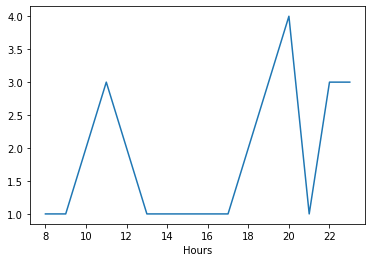

In [ ]:
df2=df.groupby(df['date'].rename('Hours').dt.hour).size().rename('d')
print(df2)
df2.plot(x ='Hours', kind = 'line')
